In [ ]:
# Visulaization

In [ ]:
 - tun tha data into charts , plots and graphs or dashboard
core library
matplotlib- 
seaborn 
pandas visualization - -- quick plots directly from dataframe(.plot())
plotly- web based cahrts
Bokesh - Intecractive visualization, dashboard


   Day  Sales  Expenses
0  Mon    200       180
1  Tue    250       200
2  Wed    300       220
3  Thu    280       210
4  Fri    350       250
5  Sat    400       300
6  Sun    420       310


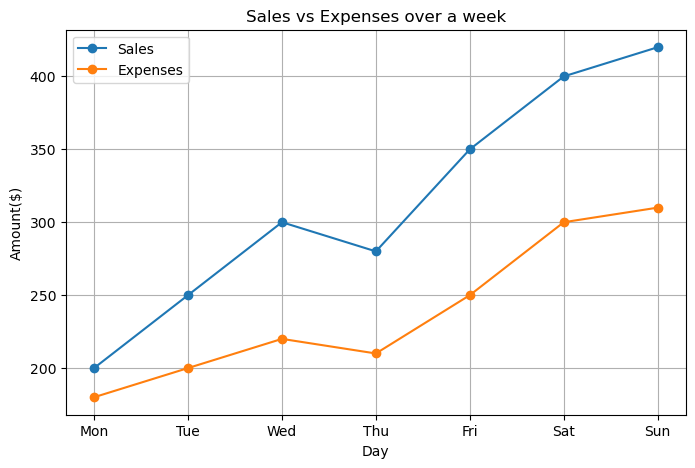

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# create a small in-memory dataset as python dict
data ={ 
    'Day':['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
    'Sales' : [200,250,300,280,350,400,420],
    'Expenses':[180,200,220,210,250,300,310]
}
df = pd.DataFrame(data)
print(df)

ax  = df.plot(
    x ='Day',
    y=['Sales','Expenses'],
    kind ='line',
    marker = 'o',
    figsize=(8,5),
    title='Sales vs Expenses over a week'
)

# label y axis using matplotlib
plt.ylabel("Amount($)")

# turn on gridline to improve readability
plt.grid(True)

plt.show()

In [5]:
import seaborn as sns

sns.set_theme(style ='whitegrid', context ='talk')

df = sns.load_dataset('tips').dropna().copy()

# create a new feature -- tip percentage of the bill
df['tip_pct'] = df['tip']/df['total_bill']*100
print(df.head(3))

   total_bill   tip     sex smoker  day    time  size    tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734


In [ ]:
## Line plot --- average total bill by day (ordered)

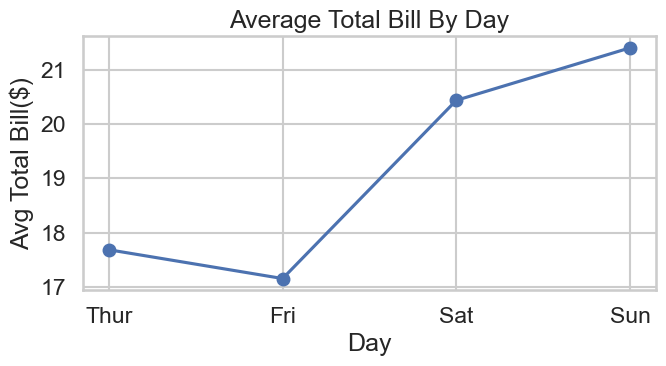

In [6]:
order = ['Thur','Fri','Sat','Sun']

# group by day column and compute the mean total bill for each day
avg_bill_by_day = (
    df.groupby('day', observed=True)['total_bill']
    .mean()
    .reindex(order)
)

# create a new figure with a specific size(in inches)
plt.figure(figsize=(7,4))

plt.plot(avg_bill_by_day.index, avg_bill_by_day.values, marker='o')

plt.title('Average Total Bill By Day')
plt.xlabel('Day')
plt.ylabel('Avg Total Bill($)')

plt.tight_layout()

plt.show()

    

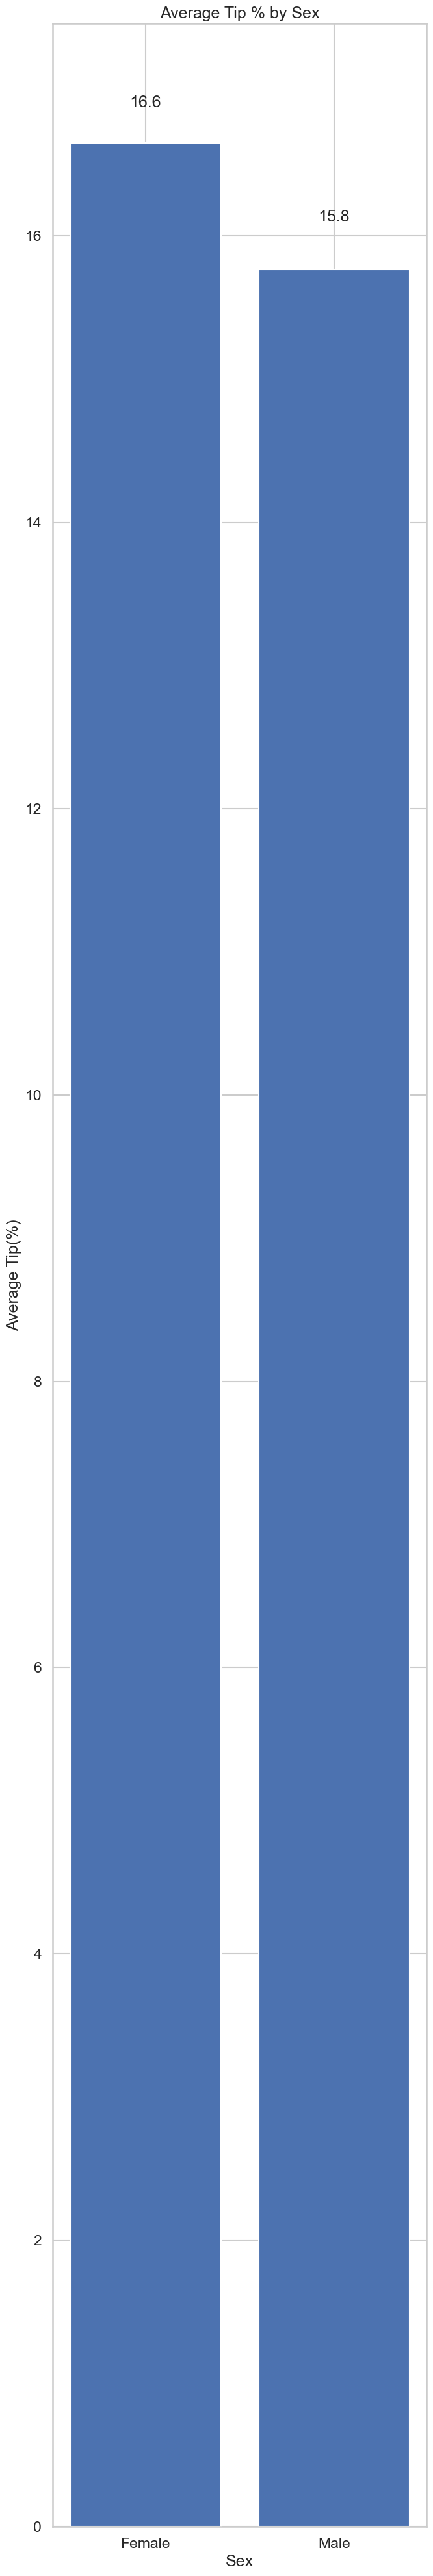

In [12]:
## bar Chart -- avg tip % by sex

avg_tip_pct_by_sex = (
    df.groupby('sex', observed = True)['tip_pct']
    .mean()
    .sort_values(ascending = False)
    .reset_index()
)

plt.figure(figsize=(7,4))

plt.bar(avg_tip_pct_by_sex['sex'],avg_tip_pct_by_sex['tip_pct'])

plt.title('Average Tip % by Sex')
plt.xlabel('Sex')
plt.ylabel("Average Tip(%)")

for i, v in enumerate(avg_tip_pct_by_sex['tip_pct'].round(1)):
          plt.text(i, v + 0.3, str(v), ha = 'center')

plt.tight_layout()
plt.show()

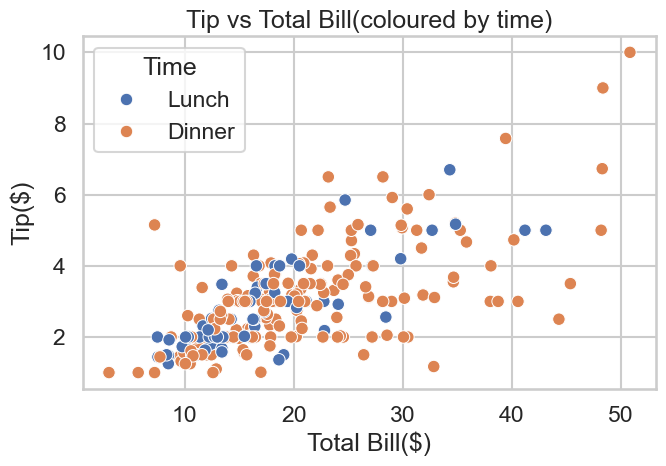

In [18]:
## Scatter plot --- total bill vs tip(coloured by time: lunch/dinner)

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time')

plt.title("Tip vs Total Bill(coloured by time)")
plt.xlabel("Total Bill($)")
plt.ylabel("Tip($)")
plt.legend(title='Time')

plt.tight_layout()
plt.show()

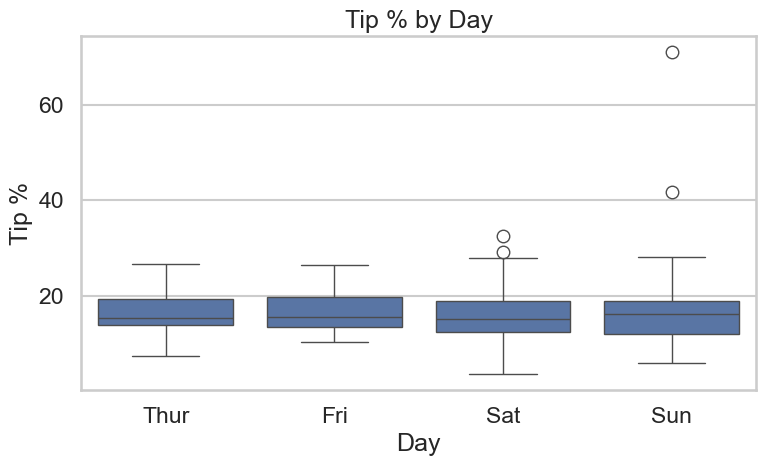

In [19]:
## Box Plot ---  distribution of tip % by day
plt.figure(figsize=(8,5))

sns.boxplot(data=df,x='day',y='tip_pct', order= order)

plt.title("Tip % by Day")
plt.xlabel("Day")
plt.ylabel("Tip %")

plt.tight_layout()

plt.show()


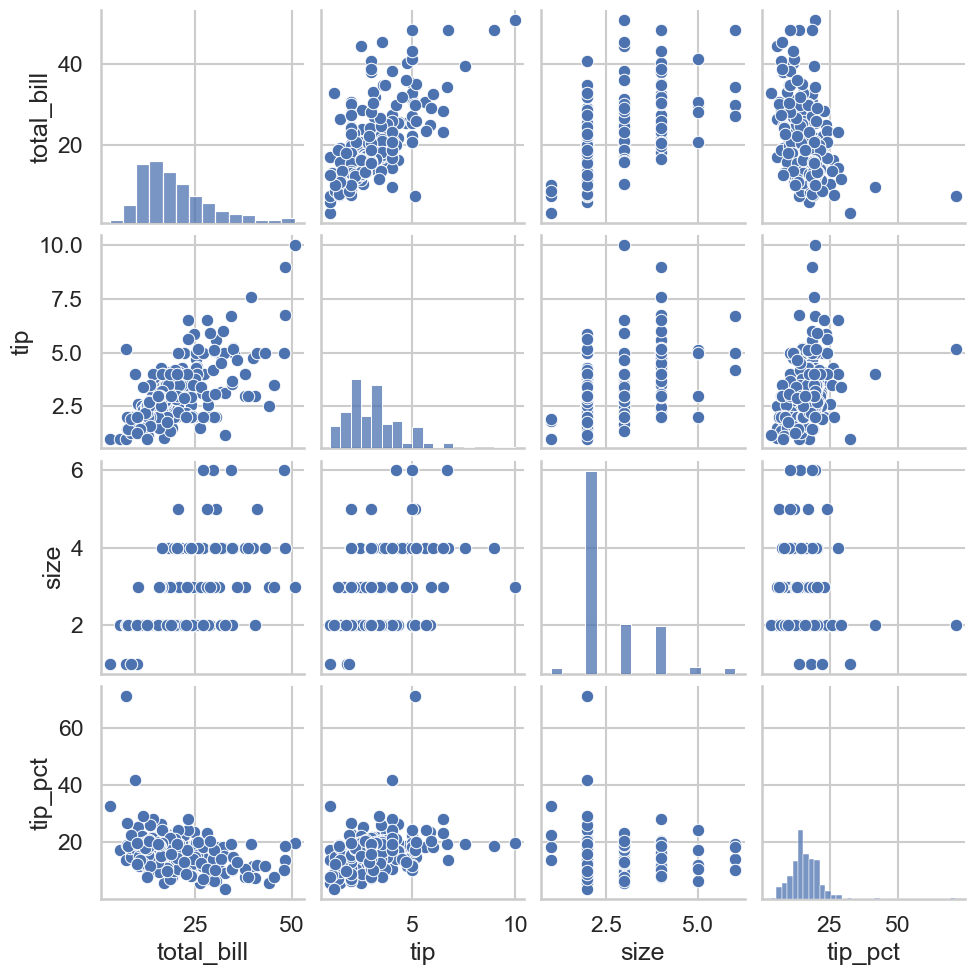

In [20]:
# #3 Pairplot --- quick multivariate view

sns.pairplot(
    df[["total_bill","tip","size","tip_pct"]],
    diag_kind='hist'
)
plt.show()